In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

isFraud - 0 - no fraud
          1 - fraud

In [6]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#  Data cleaning including missing values, outliers and multi-collinearity.  

# Missing values

In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Outliers

<Axes: >

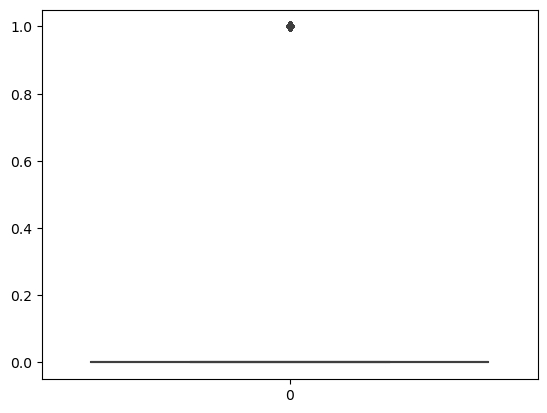

In [9]:

sns.boxplot(df['isFraud'])

In [10]:
df = df.drop(['nameOrig','nameDest'],axis = 1)

In [11]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


# Multicollinearity

In [12]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
y, X = dmatrices('amount ~ oldbalanceOrg-newbalanceOrig', data=df, return_type='dataframe')


In [14]:
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 

In [15]:
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df)

        variable       VIF
0      Intercept  1.083357
1  oldbalanceOrg  1.000000


# The VIF value for the predictor cariables in the model is 1.0 i.e multicollinearity is not a problem in the model.

# Describe your fraud detection model in elaboration. 

 It is a Python-based machine learning model we have to check whether the transaction is fraudulent. This model is a classification model that tells that the transaction can either be fraud or not fraud. For this project, I will be using some libraries including - Pandas, Numpy, Seaborn, and many more.
       Firstly I included all the libraries, and then after that with the help of pandas I loaded the dataset which consisted of some rows and columns Then first comes the EDA part after that we will check whether the data is cleaned or not so we will check the missing values, outliers, and multicollinearity then comes the process of preprocessing, Processing involves the raw data suitable for analysis so that we can achieve maximum results. So in our dataset, there are 2 columns 'nameOrig', and 'nameDest' that are not useful for our model training part so we will drop them.

Now we will import the LabelEncoder which is an algorithm that works on a binary system of data that deals with 0's and 1's then we split the data into X and Y through a log function then we will check whether the data is fraudulent or not. Then we perform train_test_split which splits our data in 70 and 30 ratio from 70 we train the data and from 30 we perform the testing of the data.

Now we will import the standard scalar library and through the fit function, we will the particular model into the function According to that we have used Naive Bayes and Gaussian classifier to fit the model into a particular algorithm so that we can maximum results. 

In [16]:
from sklearn import preprocessing
label_encoding  = preprocessing.LabelEncoder()

In [17]:
df['type'] = label_encoding.fit_transform(df['type'])

In [18]:
x,y = df.loc[:,df.columns != 'isFraud'],df['isFraud']

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 42)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 

In [22]:
gs = GaussianNB()
gs.fit(x_train,y_train)

GaussianNB()

# Demonstrate the performance of the model by using best set of tools. 

In [23]:
y_predict = gs.predict(x_test)
print(metrics.accuracy_score(y_test,y_predict))

0.9959110135971241
